In [0]:
!git clone https://github.com/SrikanthVelpuri/Classification-of-Cats-Dogs-Horses-Humans.git

Cloning into 'Classification-of-Cats-Dogs-Horses-Humans'...
remote: Enumerating objects: 806, done.
remote: Total 806 (delta 0), reused 0 (delta 0), pack-reused 806
Receiving objects: 100% (806/806), 17.97 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [0]:
!ls

Classification-of-Cats-Dogs-Horses-Humans  sample_data


In [0]:
image_data = []
labels = []

label_dict = {
    "cats":0,
    "dogs":1,
    "horses":2,
    "Humans":3
}

In [0]:
from keras.preprocessing import image
import os
folder_path = "Classification-of-Cats-Dogs-Horses-Humans/data/"
folders = os.listdir(folder_path)
print(folders)

['Humans', 'cats', 'dogs', 'horses']


In [0]:

for ix in folders:
  path = os.path.join(folder_path,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=(224,224))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [0]:
print(len(image_data), len(labels))

808 808


In [0]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [0]:
print(labels[:5])

[2, 1, 0, 2, 0]


In [0]:
print(type(combined[0]))
print(len(combined[0]))

<class 'tuple'>
2


In [0]:
import numpy as np
XTrain = np.array(image_data)
YTrain = np.array(labels)

print(XTrain.shape,YTrain.shape)

(808, 224, 224, 3) (808,)


In [0]:
from keras.utils import np_utils
YTrain = np_utils.to_categorical(YTrain)
print(XTrain.shape,YTrain.shape)

(808, 224, 224, 3) (808, 4)


In [0]:
# Create the Model Resnet 50 Model
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt

In [0]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step


In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(input=model.input,outputs=fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [0]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f6f4705c3c8>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6f4707a588>
2 <keras.layers.convolutional.Conv2D object at 0x7f6f4707a908>
3 <keras.layers.normalization.BatchNormalization object at 0x7f6f4707a7b8>
4 <keras.layers.core.Activation object at 0x7f6f4707aba8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6fe4d63588>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6f45699240>
7 <keras.layers.convolutional.Conv2D object at 0x7f6f45699d68>
8 <keras.layers.normalization.BatchNormalization object at 0x7f6f305efe10>
9 <keras.layers.core.Activation object at 0x7f6f3062cd68>
10 <keras.layers.convolutional.Conv2D object at 0x7f6f305b6470>
11 <keras.layers.normalization.BatchNormalization object at 0x7f6f305c8d68>
12 <keras.layers.core.Activation object at 0x7f6f305cffd0>
13 <keras.layers.convolutional.Conv2D object at 0x7f6f305e5cf8>
14 <keras.layers.convolutional.Conv2D object at 0x7f6f3057dd68>
15 <keras.lay

In [0]:
for ix in range(169):
  model_new.layers[ix].trainable = False

model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
hist = model_new.fit(XTrain,YTrain,shuffle=True,batch_size=16,epochs=10,validation_split=0.2)

Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 17s 26ms/step - loss: 1.2355 - accuracy: 0.4876 - val_loss: 0.6926 - val_accuracy: 0.7531
Epoch 2/10
646/646 [==============================] - 7s 10ms/step - loss: 0.6790 - accuracy: 0.7384 - val_loss: 0.4239 - val_accuracy: 0.8704
Epoch 3/10
646/646 [==============================] - 7s 10ms/step - loss: 0.4032 - accuracy: 0.8700 - val_loss: 0.3147 - val_accuracy: 0.9259
Epoch 4/10
646/646 [==============================] - 7s 10ms/step - loss: 0.3024 - accuracy: 0.9087 - val_loss: 0.2649 - val_accuracy: 0.9321
Epoch 5/10
646/646 [==============================] - 7s 10ms/step - loss: 0.2679 - accuracy: 0.9226 - val_loss: 0.2270 - val_accuracy: 0.9383
Epoch 6/10
646/646 [==============================] - 7s 10ms/step - loss: 0.1958 - accuracy: 0.9427 - val_loss: 0.1941 - val_accuracy: 0.9506
Epoch 7/10
646/646 [==============================] - 7s 10ms/step - loss: 0.1840 - accuracy: 0

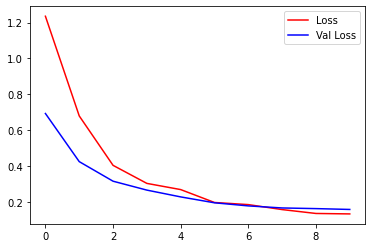

In [0]:
h = hist.history

# Visualizing loss
plt.plot(h['loss'],'r',label='Loss')
plt.plot(h['val_loss'],'b',label='Val Loss')
plt.legend()
plt.show()

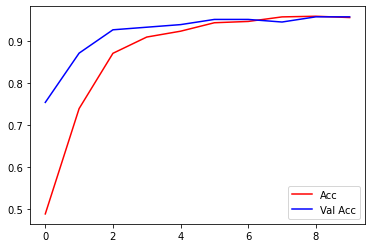

In [0]:
# Visualizing accuracy
plt.plot(h['accuracy'],'r',label='Acc')
plt.plot(h['val_accuracy'],'b',label='Val Acc')
plt.legend()
plt.show()